## Email Spam Detection 
**By- `Suraj Honkamble`**

### Import required packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Text Processing
import nltk
import re
from bs4 import BeautifulSoup
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import string
from wordcloud import WordCloud, STOPWORDS

### Load and Read the dataset

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


### Understind the data

In [4]:
df.shape

(5171, 4)

In [5]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


#### Drop unnamed: 0 column

In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df.label.unique()

array(['ham', 'spam'], dtype=object)

<Axes: >

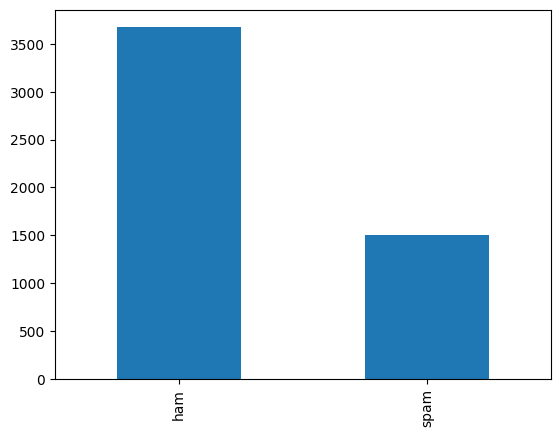

In [9]:
df.label.value_counts().plot(kind='bar')

### Check the percentage of Label category

In [10]:
per=df.label.value_counts().reset_index()
per['percentage']=(per['label']/len(df)).round(2)*100
per.columns=['label','count','percentage']
per

,label,count,percentage
0,ham,3672,71.0
1,spam,1499,29.0


**71% rows are Ham and 29% are Spam. so here we are not going to use any sampling method.**

In [11]:
df.label.value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

### Further analysis select only two columns text and label_num

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
data=df[['text','label_num']]
data.rename({'label_num':'label'}, axis=1, inplace=True)
data.head()

,text,label
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [14]:
data.isna().sum()

text     0
label    0
dtype: int64

#### To see all text in the text column

In [15]:
pd.options.display.max_colwidth=100000000000

In [16]:
data.head()

,text,label
0,"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes .",0
1,"Subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 . xls",0
2,"Subject: neon retreat\r\nho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !\r\ni know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .\r\non the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we ' re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about .\r\ni think we all agree that it ' s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester , but it can be a lot of trouble and difficult for us to get away without kids , etc . so , brad came up with a potential alternative for how we can get together on that weekend , and then you can let me know which you prefer .\r\nthe first option would be to have a retreat similar to what we ' ve done the past several years . this year we could go to the heartland country inn ( www . . com ) outside of brenham . it ' s a nice place , where we ' d have a 13 - bedroom and a 5 - bedroom house side by side . it ' s in the country , real relaxing , but also close to brenham and only about one hour and 15 minutes from here . we can golf , shop in the antique and craft stores in brenham , eat dinner together at the ranch , and spend time with each other . we ' d meet on saturday , and then return on sunday morning , just like what we ' ve done in the past .\r\nthe second option would be to stay here in houston , have dinner together at a nice restaurant , and then have dessert and a time for visiting and recharging at one of our homes on that saturday evening . this might be easier , but the trade off would be that we wouldn ' t have as much time together . i ' ll let you decide .\r\nemail me back with what would be your preference , and of course if you ' re available on that weekend . the democratic process will prevail - - majority vote will rule ! let me hear from you as soon as possible , preferably by the end of the weekend . and if the vote doesn ' t go your way , no complaining allowed ( like i tend to do ! )\r\nhave a great weekend , great golf , great fishing , great shopping , or whatever makes you happy !\r\nbobby",0
3,"Subject: photoshop , windows , office . cheap . main trending\r\nabasements darer prudently fortuitous undergone\r\nlighthearted charm orinoco taster\r\nrailroad affluent pornographic cuvier\r\nirvin parkhouse blameworthy chlorophyll\r\nrobed diagrammatic fogarty clears bayda\r\ninconveniencing managing represented smartness hashish\r\nacademies shareholders unload badness\r\ndanielson pure caffein\r\nspaniard chargeable levin\r\n",1
4,"Subject: re : indian springs\r\nthis deal is to book the teco pvr revenue . it is my understanding that teco\r\njust sends us a check , i haven ' t received an answer as to whether there is a\r\npredermined price associated with this deal or if teco just lets us know what\r\nwe are giving . i can continue to chase this deal down if you need .",0


### Text contains special charater, numbers, need to clean this text column

### Text preprocessing

#### Function to remove and replace some of words

In [17]:
def decontract(text):
    text=re.sub(r"subject","", text)
    text=re.sub(r"won\'t","will not", text)
    text=re.sub(r"can\'t","can not", text)
    text=re.sub(r"n\'t", "not", text)
    text=re.sub(r"\'re", "are", text)
    text=re.sub(r"\'s", "is", text)
    text=re.sub(r"\'d", "would", text)
    text=re.sub(r"\'ll", "will", text)
    text=re.sub(r"\'t", "not", text)
    text=re.sub(r"\'ve", "have", text)
    text=re.sub(r"\'m", "am", text)    
    return text

In [24]:
stopword=stopwords.words('english')
lem=WordNetLemmatizer()

def clean(text):
    text = str(text).lower()
    text = decontract(text)                                            # decontracting
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)                   # removing website links
    text = BeautifulSoup(text, 'lxml').get_text()                      # removing html tags
    text = re.sub('<.*?>+', '', text)
    text = re.sub("\S*\d\S*", "", text).strip()                        # removing the words with numeric digits
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[^A-Za-z]+', ' ', text)                             # removing non-word characters
    text = [word for word in text.split(' ') if word not in stopword]
    text = [lem.lemmatize(token) for token in text]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)
data.head()

,text,label
0,enron methanol meter follow note gave monday preliminary flow data provided daren please override pop daily volume presently zero reflect daily activity obtain gas control change needed asap economics purpose,0
1,hpl nom january see attached file hplnol xl hplnol xl,0
2,neon retreat ho ho ho around wonderful time year neon leader retreat time know time year extremely hectic tough think anything past holiday life go past week december january like think minute calender handed beginning fall semester retreat scheduled weekend january youth minister conference brad dustin connected week going change date following weekend january come part need think think agree important u get together time recharge battery get far spring semester lot trouble difficult u get away without kid etc brad came potential alternative get together weekend let know prefer first option would retreat similar done past several year year could go heartland country inn www com outside brenham nice place bedroom bedroom house side side country real relaxing also close brenham one hour minute golf shop antique craft store brenham eat dinner together ranch spend time meet saturday return sunday morning like done past second option would stay houston dinner together nice restaurant dessert time visiting recharging one home saturday evening might easier trade would much time together let decide email back would preference course available weekend democratic process prevail majority vote rule let hear soon possible preferably end weekend vote go way complaining allowed like tend great weekend great golf great fishing great shopping whatever make happy bobby,0
3,photoshop window office cheap main trending abasement darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clear bayda inconveniencing managing represented smartness hashish academy shareholder unload badness danielson pure caffein spaniard chargeable levin,1
4,indian spring deal book teco pvr revenue understanding teco sends u check received answer whether predermined price associated deal teco let u know giving continue chase deal need,0


### Highlighted words in Spam Category e-mail

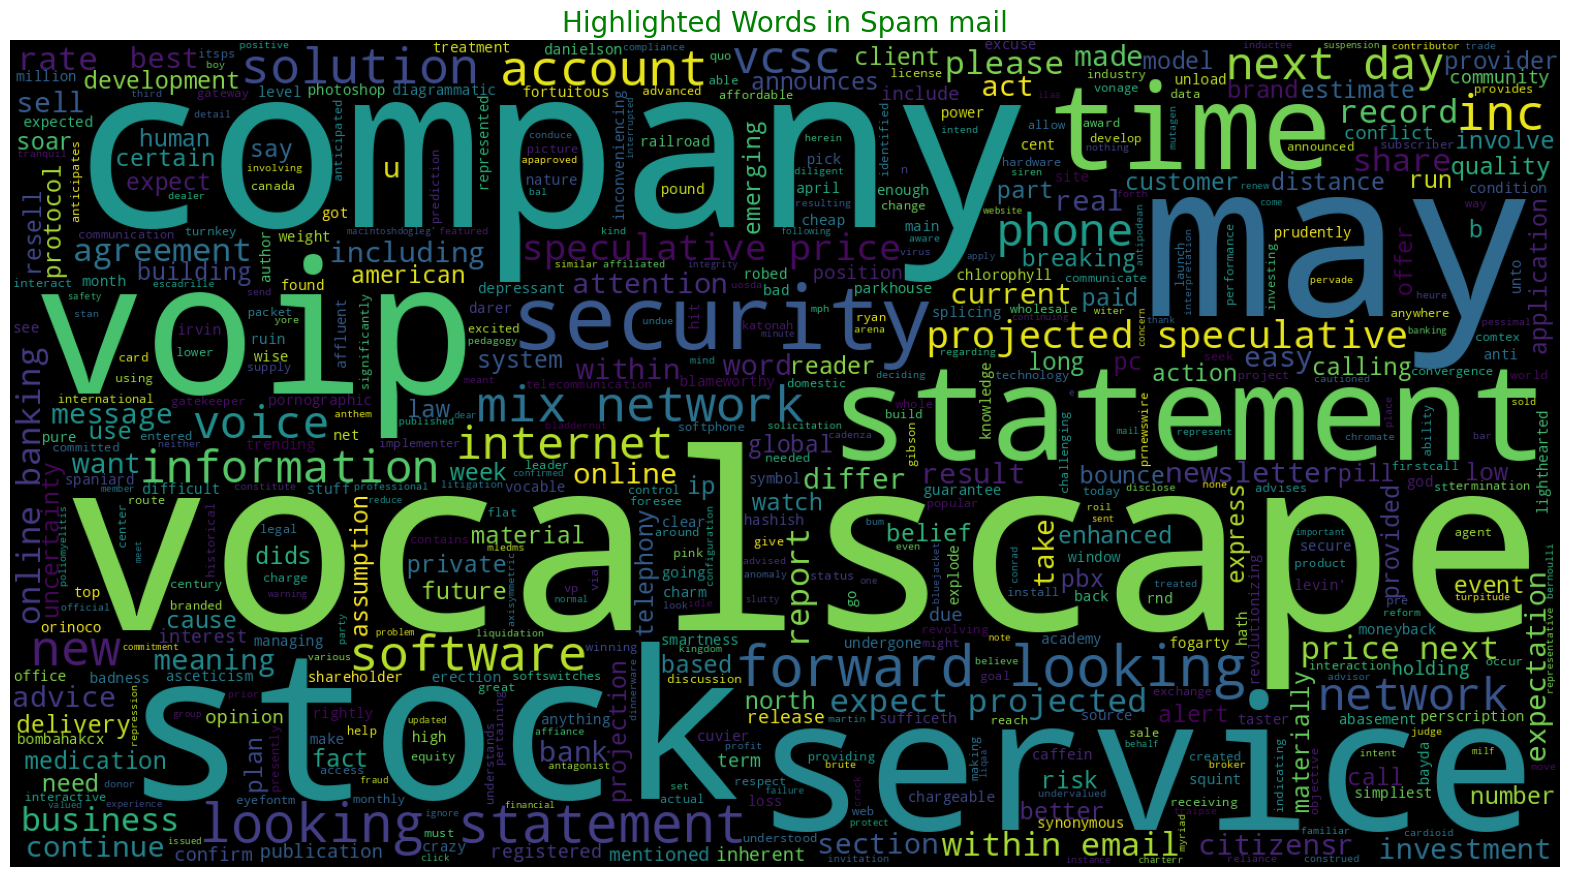

In [25]:
graph=data[data['label']==1]
txt=graph['text'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(txt))
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.title("Highlighted Words in Spam mail", color='green', fontsize=20)
plt.axis('off');

### Highlighted words in Non-Spam Category e-mail

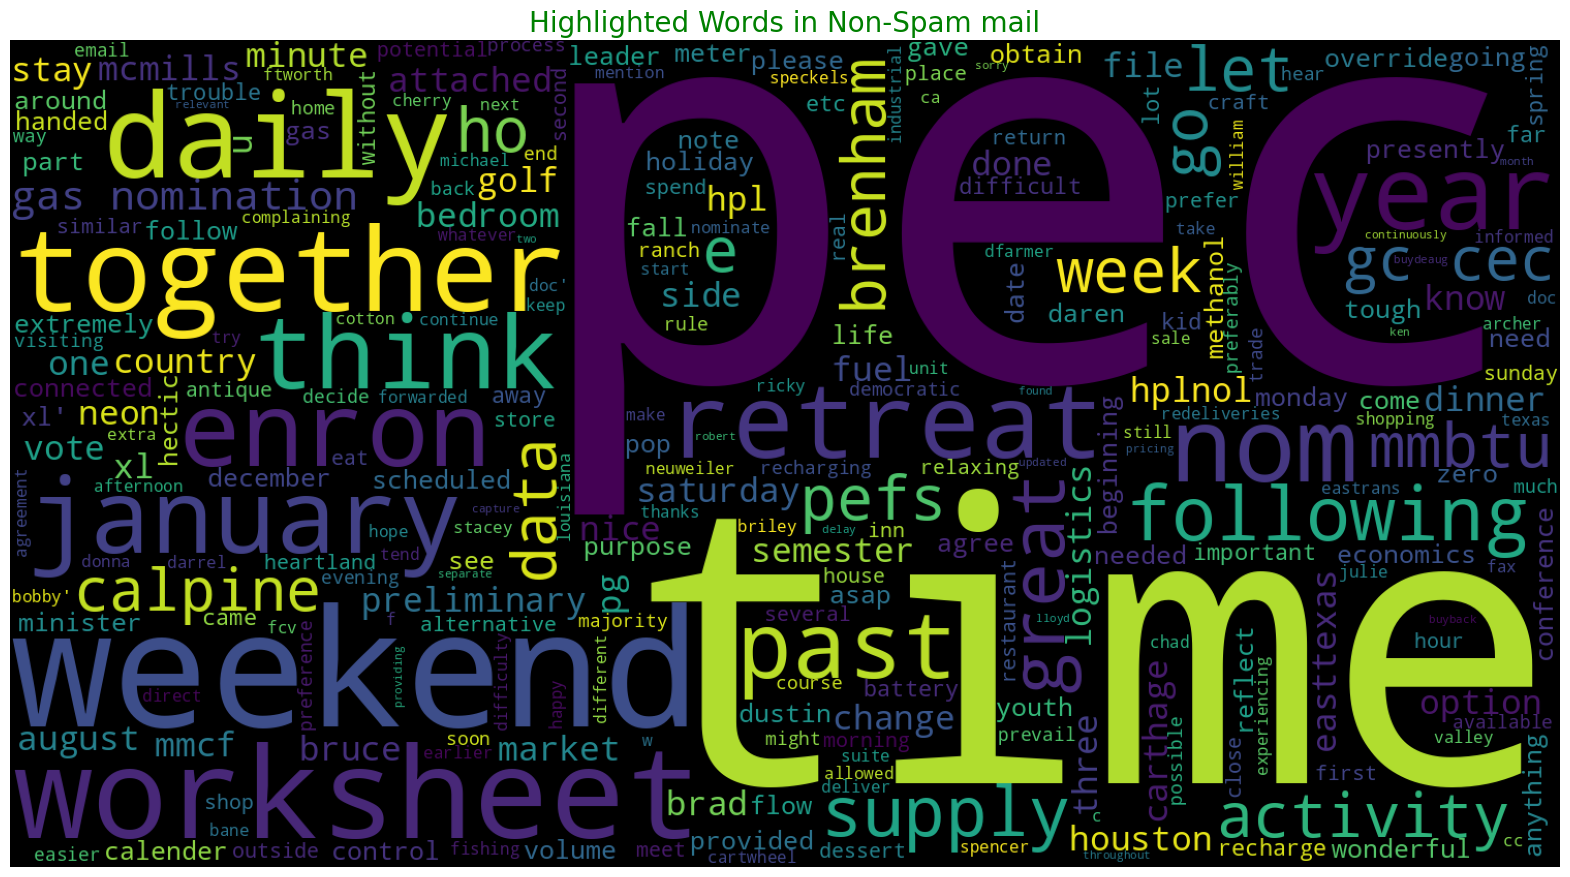

In [26]:
graph=data[data['label']==0]
txt=graph['text'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(txt))
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.title("Highlighted Words in Non-Spam mail", color='green', fontsize=20)
plt.axis('off');

## Model Developement to detect spam email

### Create Input(Independet) and Output(Dependent) features

In [27]:
X=data['text'].values
y=data['label'].values

### Split data into train test

**Here we are using just 20% data for training, as we have only 5000 data points, so we will use more data to train our model.**

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1932,random_state=0)
print("x train shape", x_train.shape)
print("x test shape", x_test.shape)
print("y train shape", y_train.shape)
print("y test shape", y_test.shape)

x train shape (4171,)
x test shape (1000,)
y train shape (4171,)
y test shape (1000,)


### As we know machine learning model only take numbers as a input, convert text to numbers using 2 techniques.

### Using TF-IDF

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
tf_fitted=tf.fit(x_train)
x_train_tf=tf_fitted.transform(x_train).toarray()
x_test_tf=tf_fitted.transform(x_test).toarray()
print(x_train_tf.shape)
print(x_test_tf.shape)

(4171, 36975)
(1000, 36975)


In [30]:
x_train_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
x_test_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Now input features are in numeric type

## Classification models

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

lr=LogisticRegression()
lr=lr.fit(x_train_tf, y_train)
y_pred=lr.predict(x_test_tf)

#### Evaluating the model

In [33]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       695
           1       0.99      0.96      0.98       305

    accuracy                           0.98      1000
   macro avg       0.99      0.98      0.98      1000
weighted avg       0.99      0.98      0.98      1000



In [34]:
print(confusion_matrix(y_pred,y_test))
print("Out of {}, {} are missclassfied".format(x_test.shape[0], sum(y_pred!=y_test)))

[[691   4]
 [ 11 294]]
Out of 1000, 15 are missclassfied


In [35]:
acc=accuracy_score(y_pred,y_test).round(4)*100
results=pd.DataFrame({"Model":["Logistic Regression"],"Accuracy":[acc]})
results

,Model,Accuracy
0,Logistic Regression,98.5


#### Test Accuracy 98.55%.

### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt=dt.fit(x_train_tf,y_train)
y_pred=dt.predict(x_test_tf)

#### Evaluating the model

In [37]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       702
           1       0.92      0.92      0.92       298

    accuracy                           0.95      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.95      0.95      0.95      1000



In [38]:
print(confusion_matrix(y_pred,y_test))
print("Out of {}, {} are missclassfied".format(x_test.shape[0], sum(y_pred!=y_test)))

[[678  24]
 [ 24 274]]
Out of 1000, 48 are missclassfied


In [39]:
acc=accuracy_score(y_pred,y_test).round(4)*100
result=pd.DataFrame({"Model":["Decision Tree"],"Accuracy":[acc]})
results=pd.concat([results,result])
results

,Model,Accuracy
0,Logistic Regression,98.5
0,Decision Tree,95.2


#### Test Accuracy is lower than Logistic Regression.

### Naive Bayes

In [42]:
from sklearn.naive_bayes import MultinomialNB

naive=MultinomialNB()
naive=naive.fit(x_train_tf,y_train)
y_pred=naive.predict(x_test_tf)

#### Evaluating the model

In [43]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       785
           1       0.72      1.00      0.84       215

    accuracy                           0.92      1000
   macro avg       0.86      0.95      0.89      1000
weighted avg       0.94      0.92      0.92      1000



In [44]:
print(confusion_matrix(y_pred,y_test))
print("Out of {}, {} are missclassfied".format(x_test.shape[0], sum(y_pred!=y_test)))

[[702  83]
 [  0 215]]
Out of 1000, 83 are missclassfied


In [45]:
acc=accuracy_score(y_pred,y_test).round(4)*100
result=pd.DataFrame({"Model":["Naive Bayes"],"Accuracy":[acc]})
results=pd.concat([results,result])
results

,Model,Accuracy
0,Logistic Regression,98.5
0,Decision Tree,95.2
0,Naive Bayes,91.7


#### Test Score is lower than Both Logistic and Decision tree.

### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf=rf.fit(x_train_tf,y_train)
y_pred=rf.predict(x_test_tf)

#### Evaluating the model

In [49]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       688
           1       0.99      0.94      0.96       312

    accuracy                           0.98      1000
   macro avg       0.98      0.97      0.97      1000
weighted avg       0.98      0.98      0.98      1000



In [50]:
print(confusion_matrix(y_pred,y_test))
print("Out of {}, {} are missclassfied".format(x_test.shape[0], sum(y_pred!=y_test)))

[[684   4]
 [ 18 294]]
Out of 1000, 22 are missclassfied


In [51]:
acc=accuracy_score(y_pred,y_test).round(4)*100
result=pd.DataFrame({"Model":["Random Forest"],"Accuracy":[acc]})
results=pd.concat([results,result])
results

,Model,Accuracy
0,Logistic Regression,98.5
0,Decision Tree,95.2
0,Naive Bayes,91.7
0,Random Forest,97.8


#### Test Accuracy is better than Decision tree and Naive Bayes.

### XGBoost

In [53]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb=xgb.fit(x_train_tf,y_train)
y_pred=xgb.predict(x_test_tf)

#### Evaluating the model

In [54]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       687
           1       0.98      0.94      0.96       313

    accuracy                           0.97      1000
   macro avg       0.98      0.96      0.97      1000
weighted avg       0.98      0.97      0.97      1000



In [55]:
print(confusion_matrix(y_pred,y_test))
print("Out of {}, {} are missclassfied".format(x_test.shape[0], sum(y_pred!=y_test)))

[[682   5]
 [ 20 293]]
Out of 1000, 25 are missclassfied


In [56]:
acc=accuracy_score(y_pred,y_test).round(4)*100
result=pd.DataFrame({"Model":["XGBoost"],"Accuracy":[acc]})
results=pd.concat([results,result])
results

,Model,Accuracy
0,Logistic Regression,98.5
0,Decision Tree,95.2
0,Naive Bayes,91.7
0,Random Forest,97.8
0,XGBoost,97.5


#### Test Accuracy is better than Decision tree and naive bayes.

### Result of all models

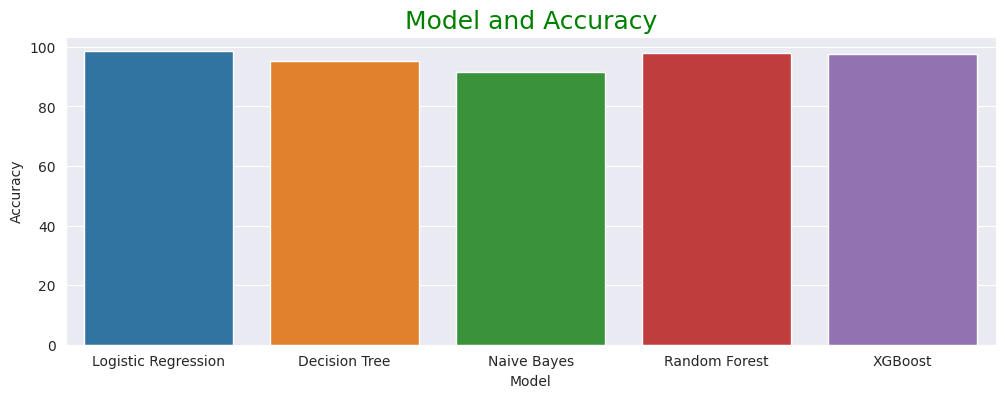

In [58]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,4))
sns.barplot(data=results, x='Model', y='Accuracy', ci=None)
plt.title("Model and Accuracy", color='green', fontsize=18);

#### Logistic regression is best fit model to predict whether the Mails and Spam or not

### Using Cross validation and GridsearchCV to see whether model performance will increase or not.

In [62]:
from sklearn.model_selection import GridSearchCV

lr=LogisticRegression()

parameters=dict(penalty=['l1','l2','elastic'], C=[1.0,2.0,3.0,4.0,5.0])
grid = GridSearchCV(lr, parameters)
grid.fit(x_train_tf,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0, 3.0, 4.0, 5.0],
                         'penalty': ['l1', 'l2', 'elastic']})

In [63]:
grid.best_params_

{'C': 3.0, 'penalty': 'l2'}

#### Train the model using these parameters

In [64]:
lr=LogisticRegression(penalty='l2',C=3.0)
lr.fit(x_train_tf,y_train)
y_pred=lr.predict(x_test_tf)
print(accuracy_score(y_pred,y_test))

0.985


**Model Performance is not increasing.**

### Test model to check your MAil is spam or not.

In [75]:
mail=[
'''Re: SURAJH8596 𝗖𝗼𝗻𝗴𝗿𝗮𝘁'𝘀 𝘁𝗵𝗶𝘀 𝐂𝐡𝐚𝐧𝐜𝐞 𝐨𝐟 𝐘𝐨𝐮𝐫 𝐋𝐢𝐟𝐞😲, ⭐⭐ 𝗬𝗼𝘂𝗿 𝟏𝟎𝟎.𝟎𝟎 𝐅𝐑𝐄𝐄 𝐒𝐏𝐈𝐍𝐒👉🏻 ,
𝗟𝗮𝘀𝘁 𝗱𝗮𝘆 𝘁𝗼 𝗖𝗼𝗻𝗳𝗶𝗿𝗺 𝐘𝐨𝐮𝐫 $𝟐𝟓,𝟎𝟎𝟎.𝟎𝟎 ✔💸🔔💎___Wed, 5 Apr 2023 16:27:30 +0000--#407736708
DuckyLuckCasino surajh8596 Winner claim your free spins on midnight racer with code SPIN100
amount 10000000$ pay to SURAJH8596.''',
'''️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️ ① PAYPAL 💲Anzahlung an Sie gesendet {Surajh}---------------------------#[18052]#
Email number #4(Regarding your payment confirmation)HELLO, Surajh@gmail.com
We're having trouble transferring your $1000.00 to your CashApp® account.
Please complete your contact information to ensure proper delivery. We will contact you using this information
This email is intended for :
E-mail:Surajh@gmail.com
DATE:Sat, 08 Apr 2023 18:49:09 -0400 (EDT)
Status:Pending confirmation
Cash:£1000.00
This transaction is pending your confirmation.
Confirm here'''
]
dd=pd.DataFrame(mail, columns=['mail'])
dd['mail']=dd['mail'].apply(lambda x : clean(x))
dd1=tf_fitted.transform(dd['mail'])
pred=xgb.predict(dd1)
for i in pred:
    if i==0:
        print("This Mail is Not-Spam")
    else:
        print("This Mail is Spam")

This Mail is Spam
This Mail is Spam
